In [2]:
import PyQt5
from pydantic_settings import BaseSettings
import pandas as pd
import ydata_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
import os
import numpy as np
from datetime import datetime, date, time
from scipy.stats import mannwhitneyu

In [3]:
%matplotlib inline

In [4]:
df_airline_yyy = pd.read_excel('airline-yyy-flight-data.xlsx', parse_dates=[6])


In [5]:
df_airline_yyy.describe()


,Departure date,Departure date and time,Day of Week,Route Code,Number of passengers
count,120,120,120.000000,120.000000,0.0
mean,2021-09-15 12:00:00,2021-09-16 03:36:14.999999488,4.033333,2.500000,NaN
min,2021-09-01 00:00:00,2021-09-01 06:35:00,1.000000,1.000000,NaN
25%,2021-09-08 00:00:00,2021-09-08 18:38:45,2.000000,1.750000,NaN
50%,2021-09-15 12:00:00,2021-09-16 02:15:00,4.000000,2.500000,NaN
75%,2021-09-23 00:00:00,2021-09-23 15:16:15,6.000000,3.250000,NaN
max,2021-09-30 00:00:00,2021-09-30 21:55:00,7.000000,4.000000,NaN
std,NaN,NaN,1.948640,1.122722,NaN


In [6]:
df_airline_xxx = pd.read_excel('airline-xxx-data.xlsx', parse_dates=[6])

In [7]:
df_airline_xxx.describe()

,Departure date,Departure date and time,Arrival delay in minutes,Delay indicator,Day of Week,Route Code,Number of passengers
count,240,240,240.000000,240.000000,240.000000,240.00000,240.000000
mean,2021-09-15 12:00:00,2021-09-16 03:23:07.500000512,15.662500,0.262500,4.033333,2.00000,112.908333
min,2021-09-01 00:00:00,2021-09-01 07:45:00,-11.000000,0.000000,1.000000,1.00000,34.000000
25%,2021-09-08 00:00:00,2021-09-08 17:15:00,4.750000,0.000000,2.000000,1.00000,85.000000
50%,2021-09-15 12:00:00,2021-09-16 02:30:00,9.000000,0.000000,4.000000,2.00000,104.000000
75%,2021-09-23 00:00:00,2021-09-23 15:35:00,15.000000,1.000000,6.000000,2.25000,128.000000
max,2021-09-30 00:00:00,2021-09-30 21:15:00,153.000000,1.000000,7.000000,4.00000,204.000000
std,NaN,NaN,27.650362,0.440912,1.944559,1.00209,41.518055


In [8]:
airline_xxx_total = len(df_airline_xxx.index)
airline_yyy_total = len(df_airline_yyy.index)

In [9]:
print("Number of flight data from Airline YYY: " + str(airline_yyy_total))
print("Number of flight data from Airline XXX: " + str(airline_xxx_total))


Number of flight data from Airline YYY: 120
Number of flight data from Airline XXX: 240


In [10]:
df_airline_xxx_actual = df_airline_xxx.loc[(df_airline_xxx['Delay indicator'] == 1) | (df_airline_xxx['Delay indicator'] == 0)]
df_airline_yyy_actual = df_airline_yyy.loc[(df_airline_yyy['Delay indicator'] == 1) | (df_airline_yyy['Delay indicator'] == 0)]

In [11]:
airline_xxx_actual = len(df_airline_xxx_actual.index)
airline_yyy_actual = len(df_airline_yyy_actual.index)


In [12]:
print("Total successful number of flights from Airline YYY: " + str(airline_yyy_actual))
print("Total successful number of flights from Airline XXX: " + str(airline_xxx_actual))

Total successful number of flights from Airline YYY: 117
Total successful number of flights from Airline XXX: 240


In [13]:
df_airline_xxx_delayed = df_airline_xxx.loc[df_airline_xxx['Delay indicator'] == 1]
df_airline_yyy_delayed = df_airline_yyy.loc[df_airline_yyy['Delay indicator'] == 1]
airline_xxx_delayed = len(df_airline_xxx_delayed.index)
airline_yyy_delayed = len(df_airline_yyy_delayed.index)

percentage_airline_yyy_delayed = airline_yyy_delayed / airline_yyy_actual * 100
percentage_airline_xxx_delayed = airline_xxx_delayed / airline_xxx_actual * 100

In [14]:
print("Number of delayed flights by Airline YYY: " + str(airline_yyy_delayed))
print("Number of delayed flights by Airline XXX: " + str(airline_xxx_delayed))

print("Percentage of delayed flights by Airline YYY: " + str(percentage_airline_yyy_delayed) + "%")
print("Percentage of delayed flights by Airline XXX: " + str(percentage_airline_xxx_delayed) + "%")

# All flights

print('Median arrival delay (all flights) for Airline YYY: ' + str(df_airline_yyy_actual['Arrival delay in minutes'].median()) + " minutes")
print('Median arrival delay (all flights) for Airline XXX: ' + str(df_airline_xxx_actual['Arrival delay in minutes'].median()) + " minutes")

print('Mean arrival delay (all flights) for Airline YYY: ' + str(df_airline_yyy_actual['Arrival delay in minutes'].mean()) + " minutes")
print('Mean arrival delay (all flights) for Airline XXX: ' + str(df_airline_xxx_actual['Arrival delay in minutes'].mean()) + " minutes")

Number of delayed flights by Airline YYY: 31
Number of delayed flights by Airline XXX: 63
Percentage of delayed flights by Airline YYY: 26.495726495726498%
Percentage of delayed flights by Airline XXX: 26.25%
Median arrival delay (all flights) for Airline YYY: 13.0 minutes
Median arrival delay (all flights) for Airline XXX: 9.0 minutes
Mean arrival delay (all flights) for Airline YYY: 10.923076923076923 minutes
Mean arrival delay (all flights) for Airline XXX: 15.6625 minutes


Text(0.5, 1.0, 'Airline XXX - Average Delay Vs. Number of Passengers')

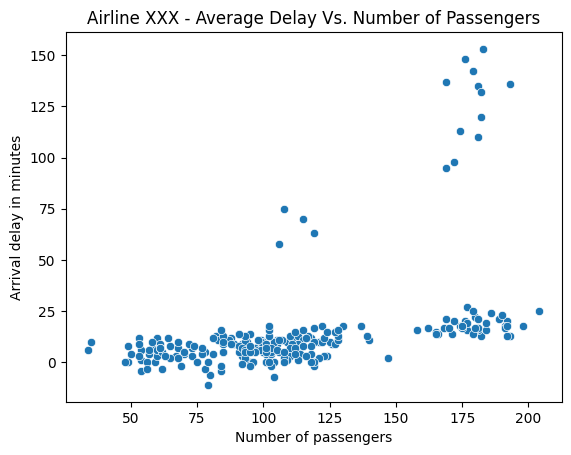

In [15]:
sns.scatterplot(x="Number of passengers",y="Arrival delay in minutes",data=df_airline_xxx_actual).set_title("Airline XXX - Average Delay Vs. Number of Passengers") # creates a scatter plot with columns xvar and yvar


Text(0.5, 1.0, 'Airline XXX - Average Delay Vs. Day')

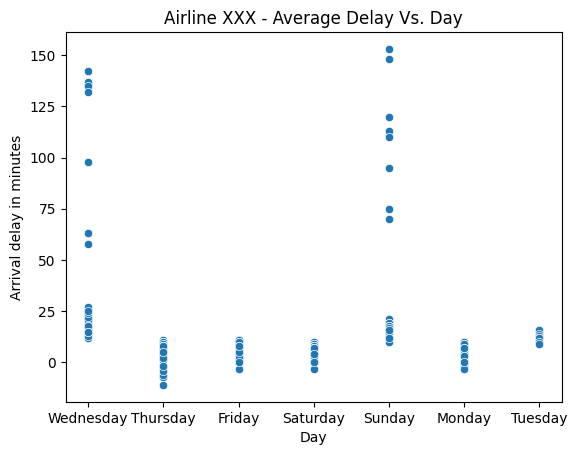

In [16]:
sns.scatterplot(x="Day",y="Arrival delay in minutes",data=df_airline_xxx_actual).set_title("Airline XXX - Average Delay Vs. Day") # creates a scatter plot with columns xvar and yvar


Text(0.5, 1.0, 'Airline YYY - Average Delay Vs. Day')

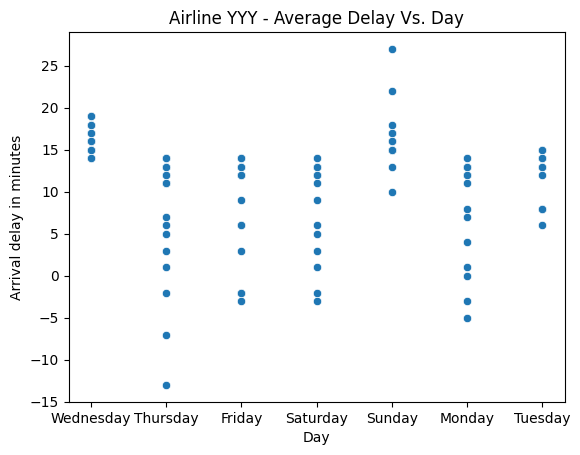

In [17]:
sns.scatterplot(x="Day",y="Arrival delay in minutes",data=df_airline_yyy_actual).set_title("Airline YYY - Average Delay Vs. Day") # creates a scatter plot with columns xvar and yvar


Text(0.5, 1.0, 'Airline YYY - Average Delay Vs. Time frame')

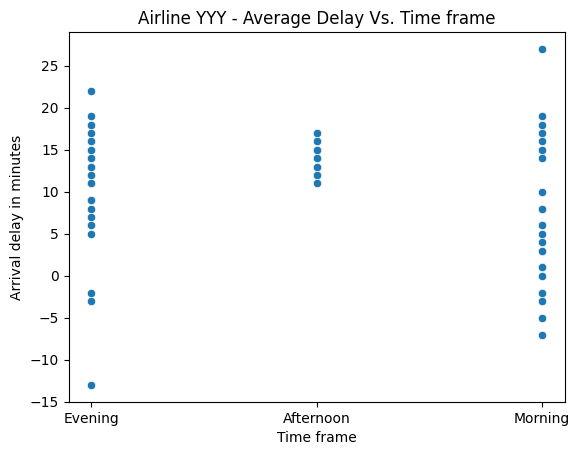

In [18]:
sns.scatterplot(x="Time frame",y="Arrival delay in minutes",data=df_airline_yyy_actual).set_title("Airline YYY - Average Delay Vs. Time frame") # creates a scatter plot with columns xvar and yvar


Text(0.5, 1.0, 'Airline XXX - Average Delay Vs. Time frame')

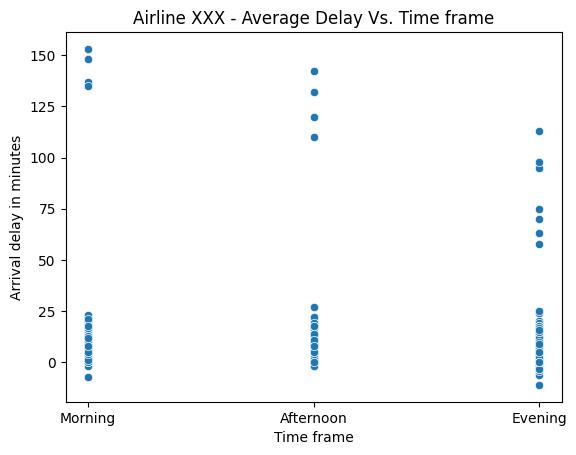

In [19]:
sns.scatterplot(x="Time frame",y="Arrival delay in minutes",data=df_airline_xxx_actual).set_title("Airline XXX - Average Delay Vs. Time frame") # creates a scatter plot with columns xvar and yvar


Text(0.5, 1.0, 'Airline YYY - Average Delay Vs. Route')

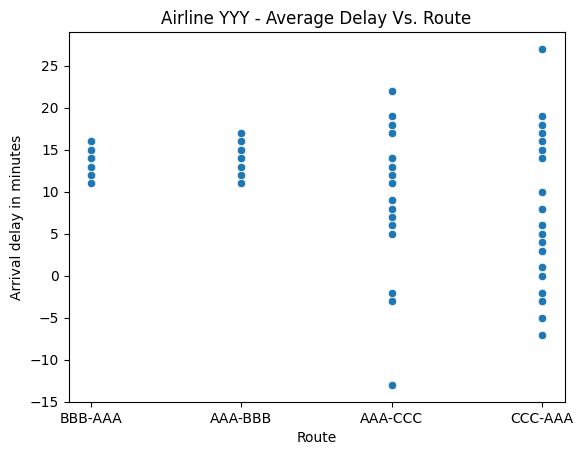

In [20]:
sns.scatterplot(x="Route",y="Arrival delay in minutes",data=df_airline_yyy_actual).set_title("Airline YYY - Average Delay Vs. Route") # creates a scatter plot with columns xvar and yvar


Text(0.5, 1.0, 'Airline XXX - Average Delay Vs. Route')

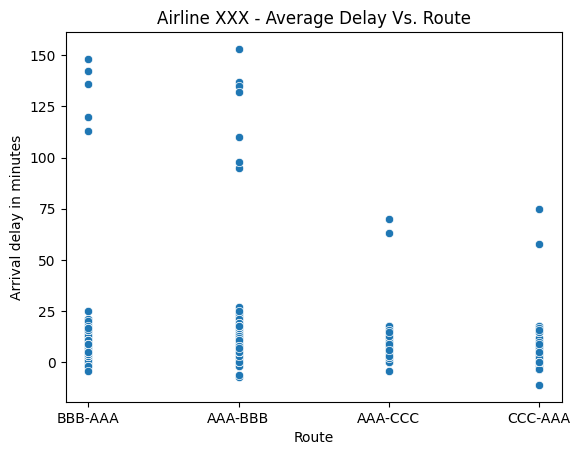

In [21]:
sns.scatterplot(x="Route",y="Arrival delay in minutes",data=df_airline_xxx_actual).set_title("Airline XXX - Average Delay Vs. Route") # creates a scatter plot with columns xvar and yvar


Text(0.5, 1.0, 'Airline XXX - Route Vs. Number of Passengers')

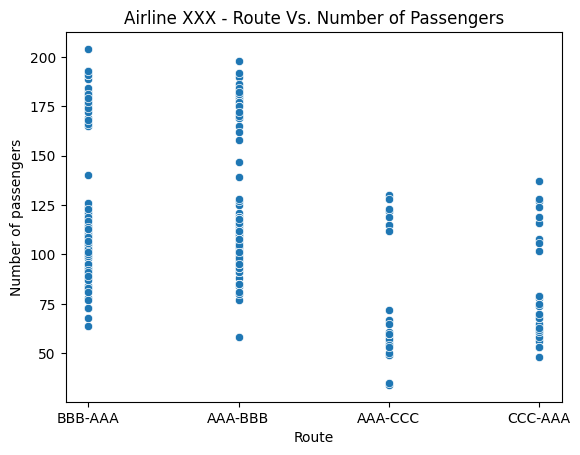

In [22]:
sns.scatterplot(x="Route",y="Number of passengers",data=df_airline_xxx_actual).set_title("Airline XXX - Route Vs. Number of Passengers") # creates a scatter plot with columns xvar and yvar

Text(0.5, 1.0, 'Airline XXX - Time frame Vs. Number of Passengers')

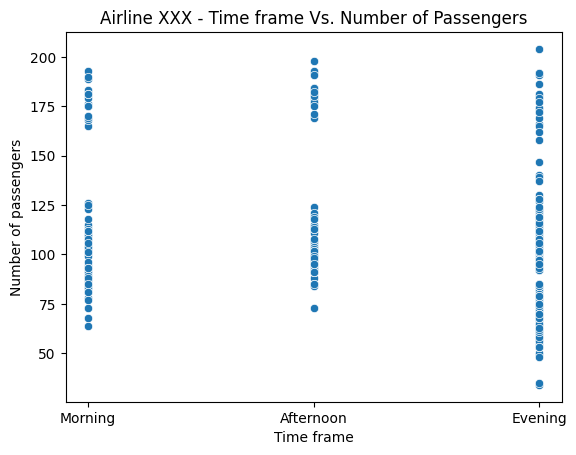

In [23]:
sns.scatterplot(x="Time frame",y="Number of passengers",data=df_airline_xxx_actual).set_title("Airline XXX - Time frame Vs. Number of Passengers") # creates a scatter plot with columns xvar and yvar

Text(0.5, 1.0, 'Airline XXX - Day Vs. Number of Passengers')

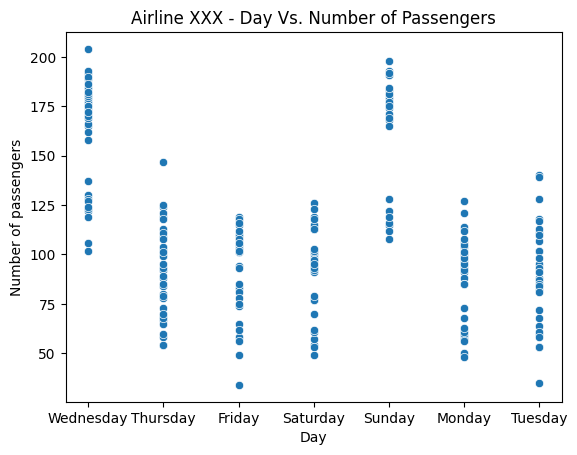

In [24]:
sns.scatterplot(x="Day",y="Number of passengers",data=df_airline_xxx_actual).set_title("Airline XXX - Day Vs. Number of Passengers") # creates a scatter plot with columns xvar and yvar

Text(0.5, 0.98, "Airline YYY's delay")

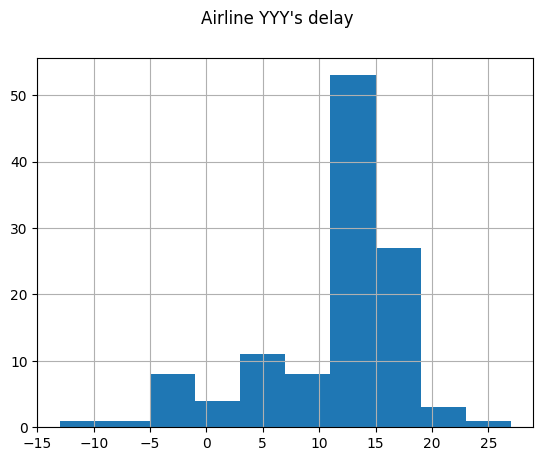

In [31]:
df_airline_yyy_actual['Arrival delay in minutes'].corr(df_airline_yyy_actual['Arrival delay in minutes'], method='pearson')
df_airline_yyy_actual['Arrival delay in minutes'].hist()
plt.suptitle("Airline YYY's delay")

Text(0.5, 0.98, "Airline XXX's delay")

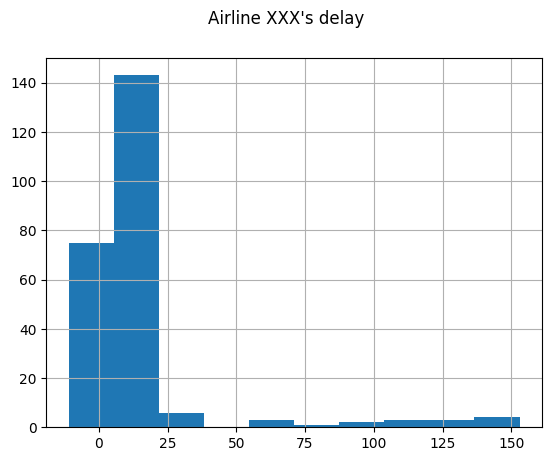

In [32]:
df_airline_xxx_actual['Arrival delay in minutes'].corr(df_airline_xxx_actual['Arrival delay in minutes'], method ='pearson')
df_airline_xxx_actual['Arrival delay in minutes'].hist()
plt.suptitle("Airline XXX's delay")

In [27]:
airline_xxx_delay = df_airline_xxx_actual["Arrival delay in minutes"].to_numpy()
airline_yyy_delay = df_airline_yyy_actual["Arrival delay in minutes"].to_numpy()
statistic, p_value = mannwhitneyu(airline_yyy_delay.astype(np.int64), airline_xxx_delay.astype(np.int64))
print("P Value is " + str(p_value))

P Value is 0.01591977956261676


In [28]:
day_dictionary = {1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"}
for day_number in day_dictionary:
    df_airline_yyy_day_all = df_airline_yyy_actual.loc[df_airline_yyy_actual['Day of Week'] == day_number]
    airline_yyy_day_all_count = len(df_airline_yyy_day_all.index)
    df_airline_yyy_day_delayed = df_airline_yyy_delayed.loc[df_airline_yyy_delayed['Day of Week'] == day_number]
    airline_yyy_day_delayed_count = len(df_airline_yyy_day_delayed.index)
    df_airline_xxx_day_all = df_airline_xxx_actual.loc[df_airline_xxx_actual['Day of Week'] == day_number]
    airline_xxx_day_all_count = len(df_airline_xxx_day_all.index)
    df_airline_xxx_day_delayed = df_airline_xxx_delayed.loc[df_airline_xxx_delayed['Day of Week'] == day_number]
    airline_xxx_day_delayed_count = len(df_airline_xxx_day_delayed.index)
    airline_yyy_day_delay_percent = airline_yyy_day_delayed_count / airline_yyy_day_all_count * 100
    airline_xxx_day_delay_percent = airline_xxx_day_delayed_count/ airline_xxx_day_all_count * 100
    df_airline_yyy_day_delay_median = df_airline_yyy_day_all["Arrival delay in minutes"].median()
    df_airline_xxx_day_delay_median = df_airline_xxx_day_all["Arrival delay in minutes"].median()
    df_airline_yyy_day_delay_mean = df_airline_yyy_day_all["Arrival delay in minutes"].mean()
    df_airline_xxx_day_delay_mean = df_airline_xxx_day_all["Arrival delay in minutes"].mean()
    df_airline_xxx_day_passenger_mean_all = df_airline_xxx_day_all["Number of passengers"].mean()
    df_airline_xxx_day_passenger_sum_all = df_airline_xxx_day_all["Number of passengers"].sum()
    df_airline_xxx_day_passenger_sum_delayed = df_airline_xxx_day_delayed["Number of passengers"].sum()
    print("Total Airline YYY flights on " + day_dictionary[day_number] + ": " + str(airline_yyy_day_all_count))
    print("Total Airline XXX flights on " + day_dictionary[day_number] + ": " + str(airline_xxx_day_all_count))
    print("Delayed Airline YYY flights on " + day_dictionary[day_number] + ": " + str(airline_yyy_day_delayed_count))
    print("Delayed Airline XXX flights on " + day_dictionary[day_number] + ": " + str(airline_xxx_day_delayed_count))
    print("Airline YYY delay percentage on " + day_dictionary[day_number] + ": " + str(airline_yyy_day_delay_percent) + '%')
    print("Airline XXX delay percentage on " + day_dictionary[day_number] + ": " + str(airline_xxx_day_delay_percent) + '%')
    print("Median delay for Airline YYY on " + day_dictionary[day_number] + ": " + str(df_airline_yyy_day_delay_median) + ' minutes')
    print("Median delay for Airline XXX on " + day_dictionary[day_number] + ": " + str(df_airline_xxx_day_delay_median) + ' minutes')
    print("Mean delay for Airline YYY on " + day_dictionary[day_number] + ": " + str(df_airline_yyy_day_delay_mean) + ' minutes')
    print("Mean delay for Airline XXX on " + day_dictionary[day_number] + ": " + str(df_airline_xxx_day_delay_mean) + ' minutes')
    print("Mean number of passengers for Airline XXX on " + day_dictionary[day_number] + ": " + str(df_airline_xxx_day_passenger_mean_all) + ' passengers')
    print("Total number of passengers for Airline XXX on " + day_dictionary[day_number] + ": " + str(df_airline_xxx_day_passenger_sum_all) + ' passengers')
    print("Delayed number of passengers for Airline XXX on " + day_dictionary[day_number] + ": " + str(df_airline_xxx_day_passenger_sum_delayed) + ' passengers')
    print("----------------------------------------------------------------")

Total Airline YYY flights on Sunday: 14
Total Airline XXX flights on Sunday: 32
Delayed Airline YYY flights on Sunday: 12
Delayed Airline XXX flights on Sunday: 24
Airline YYY delay percentage on Sunday: 85.71428571428571%
Airline XXX delay percentage on Sunday: 75.0%
Median delay for Airline YYY on Sunday: 15.5 minutes
Median delay for Airline XXX on Sunday: 17.0 minutes
Mean delay for Airline YYY on Sunday: 16.5 minutes
Mean delay for Airline XXX on Sunday: 39.5625 minutes
Mean number of passengers for Airline XXX on Sunday: 164.9375 passengers
Total number of passengers for Airline XXX on Sunday: 5278 passengers
Delayed number of passengers for Airline XXX on Sunday: 3958 passengers
----------------------------------------------------------------
Total Airline YYY flights on Monday: 16
Total Airline XXX flights on Monday: 32
Delayed Airline YYY flights on Monday: 0
Delayed Airline XXX flights on Monday: 0
Airline YYY delay percentage on Monday: 0.0%
Airline XXX delay percentage on M

In [29]:
# Airline YYY All
time_begin = ['00:00', '06:00', '12:00', '18:00']
time_end = ['05:59', '11:59', '17:59', '23:59']
for i in range(0, 4):
    # We want to filter the time
    df_airline_yyy_time_all = df_airline_yyy_actual.set_index('Departure date and time').between_time(time_begin[i], time_end[i]).reset_index()
    airline_yyy_time_all_count = len(df_airline_yyy_time_all.index)
    df_airline_yyy_time_delayed = df_airline_yyy_delayed.set_index('Departure date and time').between_time(time_begin[i], time_end[i]).reset_index()
    airline_yyy_time_delayed_count = len(df_airline_yyy_time_delayed.index)
    df_airline_xxx_time_all = df_airline_xxx_actual.set_index('Departure date and time').between_time(time_begin[i], time_end[i]).reset_index()
    airline_xxx_time_all_count = len(df_airline_xxx_time_all.index)
    df_airline_xxx_time_delayed = df_airline_xxx_delayed.set_index('Departure date and time').between_time(time_begin[i], time_end[i]).reset_index()
    airline_xxx_time_delayed_count = len(df_airline_xxx_time_delayed.index)
    if airline_yyy_time_all_count > 0:
        airline_yyy_time_delay_percent = airline_yyy_time_delayed_count / airline_yyy_time_all_count * 100
        df_airline_yyy_time_delay_median = df_airline_yyy_time_all["Arrival delay in minutes"].median()
    else:
        airline_yyy_time_delay_percent = "-"
        df_airline_yyy_time_delay_median = "-"
    if airline_xxx_time_all_count > 0:
        airline_xxx_time_delay_percent = airline_xxx_time_delayed_count/ airline_xxx_time_all_count * 100
        df_airline_xxx_time_delay_median = df_airline_xxx_time_all["Arrival delay in minutes"].median()
    else:
        airline_xxx_time_delay_percent = "-"
        df_airline_xxx_time_delay_median = "-"
    
    df_airline_yyy_time_delay_mean = df_airline_yyy_time_all["Arrival delay in minutes"].mean()
    df_airline_xxx_time_delay_mean = df_airline_xxx_time_all["Arrival delay in minutes"].mean()
    df_airline_xxx_time_passenger_mean_all = df_airline_xxx_time_all["Number of passengers"].mean()
    df_airline_xxx_time_passenger_sum_all = df_airline_xxx_time_all["Number of passengers"].sum()
    df_airline_xxx_time_passenger_sum_delayed = df_airline_xxx_time_delayed["Number of passengers"].sum()
    print("Total Airline YYY flights between " + time_begin[i] + " and " + time_end[i] + ": " + str(airline_yyy_time_all_count))
    print("Total Airline XXX flights between " + time_begin[i] + " and " + time_end[i] + ": " + str(airline_xxx_time_all_count))
    print("Delayed Airline YYY flights between " + time_begin[i] + " and " + time_end[i] + ": " + str(airline_yyy_time_delayed_count))
    print("Delayed Airline XXX flights between " + time_begin[i] + " and " + time_end[i] + ": " + str(airline_xxx_time_delayed_count))
    print("Airline YYY delay percentage between " + time_begin[i] + " and " + time_end[i] + ": " + str(airline_yyy_time_delay_percent) + '%')
    print("Airline XXX delay percentage between " + time_begin[i] + " and " + time_end[i] + ": " + str(airline_xxx_time_delay_percent) + '%')
    print("Median delay for Airline YYY between " + time_begin[i] + " and " + time_end[i] + ": " + str(df_airline_yyy_time_delay_median) + ' minutes')
    print("Median delay for Airline XXX between " + time_begin[i] + " and " + time_end[i] + ": " + str(df_airline_xxx_time_delay_median) + ' minutes')
    print("Mean delay for Airline YYY between " + time_begin[i] + " and " + time_end[i] + ": " + str(df_airline_yyy_time_delay_mean) + ' minutes')
    print("Mean delay for Airline XXX between " + time_begin[i] + " and " + time_end[i] + ": " + str(df_airline_xxx_time_delay_mean) + ' minutes')
    print("Mean number of passengers for Airline XXX between " + time_begin[i] + " and " + time_end[i] + ": " + str(df_airline_xxx_time_passenger_mean_all) + ' passengers')
    print("Total number of passengers for Airline XXX between " + time_begin[i] + " and " + time_end[i] + ": " + str(df_airline_xxx_time_passenger_sum_all) + ' passengers')
    print("Delayed number of passengers for Airline XXX between " + time_begin[i] + " and " + time_end[i] + ": " + str(df_airline_xxx_time_passenger_sum_delayed) + ' passengers')
    print("----------------------------------------------------------------")

Total Airline YYY flights between 00:00 and 05:59: 0
Total Airline XXX flights between 00:00 and 05:59: 0
Delayed Airline YYY flights between 00:00 and 05:59: 0
Delayed Airline XXX flights between 00:00 and 05:59: 0
Airline YYY delay percentage between 00:00 and 05:59: -%
Airline XXX delay percentage between 00:00 and 05:59: -%
Median delay for Airline YYY between 00:00 and 05:59: - minutes
Median delay for Airline XXX between 00:00 and 05:59: - minutes
Mean delay for Airline YYY between 00:00 and 05:59: nan minutes
Mean delay for Airline XXX between 00:00 and 05:59: nan minutes
Mean number of passengers for Airline XXX between 00:00 and 05:59: nan passengers
Total number of passengers for Airline XXX between 00:00 and 05:59: 0 passengers
Delayed number of passengers for Airline XXX between 00:00 and 05:59: 0 passengers
----------------------------------------------------------------
Total Airline YYY flights between 06:00 and 11:59: 30
Total Airline XXX flights between 06:00 and 11:59

In [30]:
route_dict = {1:"BBB-AAA",2:"AAA-BBB",3:"AAA-CCC",4:"CCC-AAA"}
for route_number in route_dict:
    df_airline_yyy_route_all = df_airline_yyy_actual.loc[df_airline_yyy_actual['Route Code'] == route_number]
    airline_yyy_route_all_count = len(df_airline_yyy_route_all.index)
    df_airline_yyy_route_delayed = df_airline_yyy_delayed.loc[df_airline_yyy_delayed['Route Code'] == route_number]
    airline_yyy_route_delayed_count = len(df_airline_yyy_route_delayed.index)
    df_airline_xxx_route_all = df_airline_xxx_actual.loc[df_airline_xxx_actual['Route Code'] == route_number]
    airline_xxx_route_all_count = len(df_airline_xxx_route_all.index)
    df_airline_xxx_route_delayed = df_airline_xxx_delayed.loc[df_airline_xxx_delayed['Route Code'] == route_number]
    airline_xxx_route_delayed_count = len(df_airline_xxx_route_delayed.index)
    airline_yyy_route_delay_percent = airline_yyy_route_delayed_count / airline_yyy_route_all_count * 100
    airline_xxx_route_delay_percent = airline_xxx_route_delayed_count/ airline_xxx_route_all_count * 100
    df_airline_yyy_route_delay_median = df_airline_yyy_route_all["Arrival delay in minutes"].median()
    df_airline_xxx_route_delay_median = df_airline_xxx_route_all["Arrival delay in minutes"].median()
    df_airline_yyy_route_delay_mean = df_airline_yyy_route_all["Arrival delay in minutes"].mean()
    df_airline_xxx_route_delay_mean = df_airline_xxx_route_all["Arrival delay in minutes"].mean()
    df_airline_xxx_route_passenger_mean_all = df_airline_xxx_route_all["Number of passengers"].mean()
    df_airline_xxx_route_passenger_sum_all = df_airline_xxx_route_all["Number of passengers"].sum()
    df_airline_xxx_route_passenger_sum_delayed = df_airline_xxx_route_delayed["Number of passengers"].sum()
    print("Total Airline YYY flights on " + route_dict[route_number] + ": " + str(airline_yyy_route_all_count))
    print("Total Airline XXX flights on " + route_dict[route_number] + ": " + str(airline_xxx_route_all_count))
    print("Delayed Airline YYY flights on " + route_dict[route_number] + ": " + str(airline_yyy_route_delayed_count))
    print("Delayed Airline XXX flights on " + route_dict[route_number] + ": " + str(airline_xxx_route_delayed_count))
    print("Airline YYY delay percentage on " + route_dict[route_number] + ": " + str(airline_yyy_route_delay_percent) + '%')
    print("Airline XXX delay percentage on " + route_dict[route_number] + ": " + str(airline_xxx_route_delay_percent) + '%')
    print("Median delay for Airline YYY on " + route_dict[route_number] + ": " + str(df_airline_yyy_route_delay_median) + ' minutes')
    print("Median delay for Airline XXX on " + route_dict[route_number] + ": " + str(df_airline_xxx_route_delay_median) + ' minutes')
    print("Mean delay for Airline YYY on " + route_dict[route_number] + ": " + str(df_airline_yyy_route_delay_mean) + ' minutes')
    print("Mean delay for Airline XXX on " + route_dict[route_number] + ": " + str(df_airline_xxx_route_delay_mean) + ' minutes')
    print("Mean number of passengers for Airline XXX on " + route_dict[route_number] + ": " + str(df_airline_xxx_route_passenger_mean_all) + ' passengers')
    print("Total number of passengers for Airline XXX on " + route_dict[route_number] + ": " + str(df_airline_xxx_route_passenger_sum_all) + ' passengers')
    print("Delayed number of passengers for Airline XXX on " + route_dict[route_number] + ": " + str(df_airline_xxx_route_passenger_sum_delayed) + ' passengers')
    print("----------------------------------------------------------------")

Total Airline YYY flights on BBB-AAA: 28
Total Airline XXX flights on BBB-AAA: 90
Delayed Airline YYY flights on BBB-AAA: 8
Delayed Airline XXX flights on BBB-AAA: 23
Airline YYY delay percentage on BBB-AAA: 28.57142857142857%
Airline XXX delay percentage on BBB-AAA: 25.555555555555554%
Median delay for Airline YYY on BBB-AAA: 14.0 minutes
Median delay for Airline XXX on BBB-AAA: 10.0 minutes
Mean delay for Airline YYY on BBB-AAA: 13.714285714285714 minutes
Mean delay for Airline XXX on BBB-AAA: 16.42222222222222 minutes
Mean number of passengers for Airline XXX on BBB-AAA: 124.3 passengers
Total number of passengers for Airline XXX on BBB-AAA: 11187 passengers
Delayed number of passengers for Airline XXX on BBB-AAA: 4158 passengers
----------------------------------------------------------------
Total Airline YYY flights on AAA-BBB: 29
Total Airline XXX flights on AAA-BBB: 90
Delayed Airline YYY flights on AAA-BBB: 9
Delayed Airline XXX flights on AAA-BBB: 26
Airline YYY delay percent